In [1]:
# import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
# from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_yaml
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception

from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import datetime

from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


创建测试和训练的数据集

In [2]:
main_path = "D:\\陈雪\\Jupyter Notebook\\qimodataset3"
with_mask_path = "D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask"
without_mask_path = "D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask"

In [3]:
from distutils.dir_util import copy_tree

if os.path.isdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3') is False:
        
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3')
    
    fromDir_main='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\'
    fromDir_with='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask'
    fromDir_without='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask'
    
    toDir_main= 'D:\\陈雪\\Jupyter Notebook\\qimodataset3\\dataset'
    toDir_with='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask'
    toDir_without='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask'
    
    
    fromDir_list=[fromDir_main,fromDir_with,fromDir_incorrect,fromDir_without]
    
    toDir_list=[toDir_main,toDir_with,toDir_incorrect,toDir_without]


    for fromDir,toDir in zip(fromDir_list,toDir_list):
        copy_tree(fromDir,toDir)

In [4]:
print(len(os.listdir("D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask")))
print(len(os.listdir("D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask")))

690
686


In [5]:
from distutils.dir_util import copy_tree

if os.path.isdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3') is False:
        
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3')
    
    fromDir_main='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\'
    fromDir_with='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask'
    fromDir_without='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask'
    
    toDir_main= 'D:\\陈雪\\Jupyter Notebook\\qimodataset3'
    toDir_with='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\with_mask'
    toDir_without='D:\\陈雪\\Jupyter Notebook\\qimodataset3\\without_mask'
    
    
    fromDir_list=[fromDir_main,fromDir_with,fromDir_incorrect,fromDir_without]
    
    toDir_list=[toDir_main,toDir_with,toDir_incorrect,toDir_without]


    for fromDir,toDir in zip(fromDir_list,toDir_list):
        copy_tree(fromDir,toDir)

根据标签划分训练和测试数据集

In [6]:
import os
train_size=540
test_size=60
os.chdir(main_path)
if os.path.isdir('valid/with_mask') is False:
#     #train:
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\with_mask')
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\without_mask')
    
    #test:
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\with_mask')
    os.makedirs('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\without_mask')

#     print(train_size)
#     print(test_size)
#     print(glob.glob('*'))
    os.chdir(with_mask_path)
    for i in random.sample(glob.glob('*'), train_size):
        shutil.move(i,
                    'D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\with_mask')
   
    os.chdir(without_mask_path)
    for i in random.sample(glob.glob('*'), train_size):
        shutil.move(i,
                    'D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\without_mask')
    
    os.chdir(with_mask_path)
    for i in random.sample(glob.glob('*'), test_size):
        shutil.move(i,
                    'D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\with_mask')
    
    
    os.chdir(without_mask_path)
    for i in random.sample(glob.glob('*'), test_size):
        shutil.move(i,
                    'D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\without_mask')
        
os.chdir('../../')

In [7]:
#合理性检查
print(len(os.listdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\with_mask')))
print(len(os.listdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\train\\without_mask')))

print(len(os.listdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\with_mask')))
print(len(os.listdir('D:\\陈雪\\Jupyter Notebook\\qimodataset3\\test\\without_mask')))


540
540
60
60


来自训练和测试数据集的 每个标签的示例展示

training images



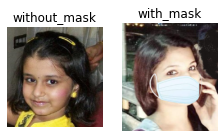

testing images



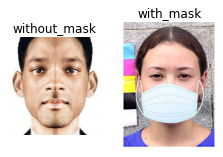

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


train_dir='D:/陈雪/Jupyter Notebook/qimodataset3/train/'
test_dir='D:/陈雪/Jupyter Notebook/qimodataset3/test/'


print('training images\n')
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

print('testing images\n')
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img((test_dir + expression +'/'+ os.listdir(test_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

建模--VGG模型
选择了VGG16模型进行训练数据

In [9]:
#对训练数据使用数据增强--图片生成器，进行图片旋转、变形、归一化等

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,                          #随机放大
                                   rotation_range=30,                       #随机旋转度数
                                   width_shift_range=0.2,                   #随机水平平移
                                   height_shift_range=0.2,                  #随机垂直平移
                                   brightness_range=[0.4,1.5],              #亮度变化
                                   horizontal_flip=True                    #亮度变化
                                  )
#训练数据导入
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(224,224),        #图像将被改成此尺寸，
                                                shuffle=True,                 # 是否打乱数据
                                                color_mode='rgb',
                                                class_mode='categorical')

#验证数据不适用模型增强
test_datagen = ImageDataGenerator(rescale=1./255  #数据归一化)
#验证数据导入
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32, #每次喂入数据量
                                                target_size=(224,224),
                                                shuffle=True,
                                                color_mode='rgb',
                                                class_mode='categorical' #决定了返回的标签数组形式，返回2D的one-hot编码标签。
                                           )
#以文件夹路径为参数,生成经过数据提升/归一化后的数据,
#在一个无限循环中无限产生batch数据

Found 1080 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


模型初始化

In [10]:
vgg = VGG16(weights='imagenet', include_top=False,input_shape = (224,224,3))

#建立一个模型，其类型是Keras的Model类对象，我们构建的模型会将VGG16顶层去掉，
#只保留其余的网络结构。这里的include_top = False表明我们迁移顶层以外的其他网络结构
#到自己的模型中


In [11]:
for layer in vgg.layers:
    layer.trainable = False #冻结网络层：将网络层排除在训练之外

模型创建

In [12]:
#构建模型，增加全连接层，连接在vgg16模型后面，
#利用vgg16卷积神经网络训练好的特征提取能力来提取特征
#然后搭建新的全连接层来进行新图片类型的分类
vgg16_model = Sequential()  
vgg16_model.add(vgg)
vgg16_model.add(Flatten()) #添加全连接神经网络，即分类器
vgg16_model.add(Dense( 2, activation = "softmax"))  #最终分类为2

vgg16_model.summary()  #以文本显示模型超参数
print(vgg16_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


模型图：

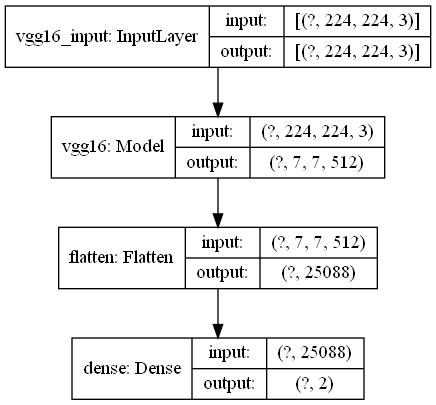

In [13]:
import pydot_ng as pydot
plot_model(vgg16_model, to_file='vgg16_diagram.jpg',
           show_shapes=True, show_layer_names=True)

> The Training Itself:

In [14]:
val_steps = test_set.n // test_set.batch_size
steps_per_epoch = training_set.n // training_set.batch_size

checkpoint = ModelCheckpoint("vgg16.h5",
                             monitor = "val_accuracy",#需要监视的值
                             save_best_only = True,#只保存验证集上性能最好的模型
                             verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=8,verbose=1)
#早停作用：设置了一个很大的epochs的时候，模型训练到一半的时候，accuracy或者loss
#已经不再变化，可以提前终止训练

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True) 
#学习率未0.01；参数更新动量为0.09；是否应用Nesterov动量

#优化模型---损失函数采用了categorical_crossentropy 
#定义优化器
vgg16_model.compile(optimizer=sgd,loss = "categorical_crossentropy",
                    metrics = ["accuracy"])

#进行训练
history = vgg16_model.fit(x=training_set,
                 validation_data=test_set, #用来评估损失以及在每轮结束时的任何模型度量指标
                 epochs=10,#迭代次数，进行是10次训练
                 callbacks=[checkpoint,earlystop],
                 steps_per_epoch=steps_per_epoch, #每一个epoch包含的步数
                 validation_steps=val_steps #仅当steps_per_epoch被指定时有用，在测试集上的step总数
                         )

Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 15.7560 - accuracy: 0.6145
Epoch 00001: val_accuracy improved from -inf to 0.98958, saving model to vgg16.h5
33/33 [==============================] - 282s 9s/step - loss: 15.7560 - accuracy: 0.6145 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 1.0383 - accuracy: 0.9046
Epoch 00002: val_accuracy did not improve from 0.98958
33/33 [==============================] - 290s 9s/step - loss: 1.0383 - accuracy: 0.9046 - val_loss: 0.2049 - val_accuracy: 0.9896
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.8517 - accuracy: 0.9198
Epoch 00003: val_accuracy did not improve from 0.98958
33/33 [==============================] - 290s 9s/step - loss: 0.8517 - accuracy: 0.9198 - val_loss: 0.0180 - val_accuracy: 0.9896
Epoch 4/10
33/33 [==============================] - ETA: 0s - loss: 0.4404 - accuracy: 0.9447
Epoch 00004: val_accuracy did not improv

损失和准确率

In [24]:
def plot_res(history): #
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.show()

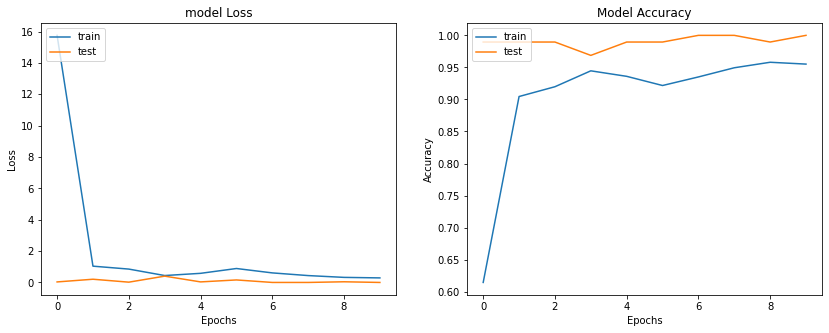

In [25]:
plot_res(history)